# Data Loading

### Download dataset dari kaggle

> Pengambilan dataset dari kaggle dilakukan menggunakan API kaggle. Dataset diunduh dengan menuliskan kode dengan format nama_pembuat/nama_dataset. Setelah pengunduhan dataset berhasil, dataset kemudian di unzip dan siap digunakan.

> Pertama-tama, mari install package kaggle terlebih dahulu





In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

> Kemudian mari atur API key kaggle.json

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

> Setelah itu, mari cari dataset yang diinginkan, dalam hal ini saya memilih dataset dengan keyword pencarian 'car-price'

In [ ]:
!kaggle datasets list -s car-price

ref                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/car-price-prediction-challenge       Car Price Prediction Challenge                   429KB  2022-07-06 11:38:32           2777         96  0.9411765        
hellbuoy/car-price-prediction                       Car Price Prediction Multiple Linear Regression   18KB  2019-10-15 16:45:27          36781        407  0.7058824        
adhurimquku/ford-car-price-prediction               Ford Car Price Prediction                        174KB  2022-04-11 10:15:03           3186         55  0.9411765        
avikasliwal/used-cars-price-prediction              Used Cars Price Prediction                       172KB  2019-06-25 10:26:52        

> Pilih salah satu dataset yang muncul dan download dengan format nama_pembuat/nama_dataset

In [ ]:
!kaggle datasets download aleksandrglotov/car-prices-poland --unzip

  0% 0.00/1.64M [00:00<?, ?B/s]
100% 1.64M/1.64M [00:00<00:00, 113MB/s]


### Import Library & Data Overview

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
cars = pd.read_csv('/content/Car_Prices_Poland_Kaggle.csv')
cars.tail()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500
117926,117926,volvo,xc-90,gen-ii-2014-xc-90,2016,189020,1969,Gasoline,Sionna,Mazowieckie,130000


# Exploratory Data Analysis

> Berdasarkan dokumentasi dataset pada website kaggle, dataset ini memiliki column:
*   Unnamed:0: kolom kosong dari dataset (sudah default dari dataset asli)
*   mark: jenis dari mobil
*   model: model dari mobil
*   generation_name: generasi mobil
*   year: tahun mobil diproduksi
*   mileage: jarak tempuh mobil sejak dibeli
*   vol_engine: berat mesin mobil
*   fuel: bensin yang digunakan mobil
*   city: kota mobil diproduksi
*   province: provinsi mobil diproduksi
*   price: harga dari mobil (target)

### Deskripsi Variabel

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


Berdasarkan info diatas, terlihat bahwa
*   terdapat 6 column bertipe object
*   terdapat 5 column numerik bertipe int64





In [ ]:
cars.describe()

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06


### Data Cleaning

> Langkah pertama adalah menghapus kolom unnamed: 0, karena kolom tersebut hanyalah kolom kosong, jadi tidak diperlukan



In [ ]:
cars.drop(columns='Unnamed: 0', inplace=True)
cars.head(2)

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501


> Berdasarkan info dataset, jumlah generasi_name tidak sama dengan jumlah kolom lain, hal tersebut menunjukkan terdapat missing value

In [ ]:
missing = cars.isnull().sum()
missing

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

> Daripada harus menangani missing value untuk 30.000 lebih baris hanya pada satu kolom, alangkah lebih baik jika kolom tersebut dihapus saja.

In [ ]:
cars.drop(columns='generation_name', inplace=True)
cars.head(2)

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501


> Berdasarkan fungsi describe(), kolom mileage dan vol_engine memiliki nilai terkecil nol, hal tersebut tidak mungkin terjadi.

In [ ]:
cars.loc[(cars['mileage']==0)]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
3202,opel,astra,2021,0,0,Diesel,Katowice,Śląskie,91600
3248,opel,astra,2021,0,0,Diesel,Katowice,Śląskie,100000
5496,opel,corsa,2021,0,0,Gasoline,Katowice,Śląskie,75890
5498,opel,corsa,2021,0,0,Gasoline,Katowice,Śląskie,76790
5699,opel,crossland-x,2021,0,0,Gasoline,Chorzów,Śląskie,80968
...,...,...,...,...,...,...,...,...,...
111456,seat,ateca,2022,0,0,Gasoline,Wrocław,Dolnośląskie,129055
111457,seat,ateca,2022,0,0,Gasoline,Wrocław,Dolnośląskie,129055
111458,seat,ateca,2022,0,0,Gasoline,Wrocław,Dolnośląskie,143314
113303,seat,leon,2021,0,0,Gasoline,Wrocław,Dolnośląskie,102085


In [ ]:
cars.loc[(cars['vol_engine']==0)]

,mark,model,year,mileage,vol_engine,fuel,city,province,price
370,opel,ampera,2019,23304,0,Electric,Gdańsk,Pomorskie,149900
3202,opel,astra,2021,0,0,Diesel,Katowice,Śląskie,91600
3248,opel,astra,2021,0,0,Diesel,Katowice,Śląskie,100000
5393,opel,corsa,2020,5000,0,Electric,Chorzów,Śląskie,119900
5414,opel,corsa,2021,5,0,Electric,Łódź,Łódzkie,105900
...,...,...,...,...,...,...,...,...,...
115956,volvo,xc-40,2021,5,0,Electric,Gdynia,Pomorskie,252900
115967,volvo,xc-40,2022,1,0,Electric,Katowice,Śląskie,220600
115990,volvo,xc-40,2021,4300,0,Electric,Tychy,Śląskie,284900
115995,volvo,xc-40,2021,1,0,Electric,Chorzów,Śląskie,210100


> Jumlah kolom mileage dan vol_engine yang bernilai nol masing-masing adalah 373 dan 1248 baris. Jumlah tersebut sangat kecil jika dibandingkan dengan keseluruhan dataset yaitu sekitar 117.000 baris. Jadi mari hapus baris kolom mileage dan vol_engine yang mempunyai nilai nol.

In [ ]:
cars = cars.loc[(cars[['mileage','vol_engine']]!=0).all(axis=1)]
cars.shape

(116679, 9)



> Sekarang dataset terlihat rapi, langkah selanjutnya adalah menghapus nilai duplikat jika ada





In [ ]:
cars.drop_duplicates(inplace=True)
cars.shape

(110090, 9)

> Setelah ini, coba kita cek kembali kolom numerik dengan fungsi describe() dan info()

In [ ]:
cars.describe()

,year,mileage,vol_engine,price
count,110090.000000,1.100900e+05,110090.000000,1.100900e+05
mean,2012.811318,1.431075e+05,1827.929757,6.745183e+04
std,5.624045,9.115029e+04,618.801467,8.155119e+04
min,1945.000000,1.000000e+00,1.000000,5.000000e+02
25%,2009.000000,7.200000e+04,1461.000000,2.099900e+04
50%,2013.000000,1.485000e+05,1796.000000,4.090000e+04
75%,2017.000000,2.038165e+05,1995.000000,7.990000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110090 entries, 0 to 117254
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        110090 non-null  object
 1   model       110090 non-null  object
 2   year        110090 non-null  int64 
 3   mileage     110090 non-null  int64 
 4   vol_engine  110090 non-null  int64 
 5   fuel        110090 non-null  object
 6   city        110090 non-null  object
 7   province    110090 non-null  object
 8   price       110090 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.4+ MB


> Sepertinya tidak ada masalah, selanjutnya mari kita tangani outlier jika memang ada

In [ ]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR=Q3-Q1
cars=cars[~((cars<(Q1-1.5*IQR))|(cars>(Q3+1.5*IQR))).any(axis=1)]
cars.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(94393, 9)

> Terakhir untuk memudahkan dalam data preprocessing, mari ubah tipe kolom numerik menjadi float64

In [ ]:
cars['year'] = cars['year'].astype('float64')
cars['mileage'] = cars['mileage'].astype('float64')
cars['vol_engine'] = cars['vol_engine'].astype('float64')

> Kemudian kita cek dataset kembali dengan fungsi info() dan describe()

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94393 entries, 0 to 117254
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mark        94393 non-null  object 
 1   model       94393 non-null  object 
 2   year        94393 non-null  float64
 3   mileage     94393 non-null  float64
 4   vol_engine  94393 non-null  float64
 5   fuel        94393 non-null  object 
 6   city        94393 non-null  object 
 7   province    94393 non-null  object 
 8   price       94393 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 7.2+ MB


In [ ]:
cars.describe()

,year,mileage,vol_engine,price
count,94393.000000,94393.000000,94393.000000,94393.000000
mean,2012.469622,148397.653777,1669.068925,47246.519498
std,5.200417,82751.991794,344.170343,36130.114259
min,1997.000000,1.000000,875.000000,500.000000
25%,2009.000000,87000.000000,1397.000000,19500.000000
50%,2013.000000,154000.000000,1598.000000,35999.000000
75%,2017.000000,204000.000000,1984.000000,65600.000000
max,2022.000000,401315.000000,2796.000000,168200.000000


> Fyuuuhhh, akhirnya selesai data cleaning

### Univariate Analysis

##### Kolom Kategorical

In [ ]:
categorical_col = cars.select_dtypes(['object'])
categorical_col.head(2)

,mark,model,fuel,city,province
0,opel,combo,Diesel,Janki,Mazowieckie
1,opel,combo,Diesel,Katowice,Śląskie


> Sebelum analysis setiap fitur, mari siapkan fungsi analysis untuk mengurangi boilerplate kode

In [ ]:
def feature_analysis(feature):
  count = cars[feature].value_counts()
  percent = 100*cars[feature].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(df)
  count.plot(kind='bar', title=feature);

> Fitur mark

               jumlah sampel  persentase
opel                    9868        10.5
volkswagen              9402        10.0
ford                    8720         9.2
audi                    6780         7.2
renault                 6628         7.0
bmw                     6027         6.4
skoda                   5469         5.8
toyota                  4792         5.1
peugeot                 4765         5.0
hyundai                 3863         4.1
kia                     3449         3.7
mercedes-benz           3249         3.4
nissan                  2916         3.1
seat                    2783         2.9
mazda                   2757         2.9
citroen                 2667         2.8
fiat                    2656         2.8
volvo                   2504         2.7
honda                   1991         2.1
mitsubishi              1020         1.1
mini                     999         1.1
alfa-romeo               573         0.6
chevrolet                515         0.5


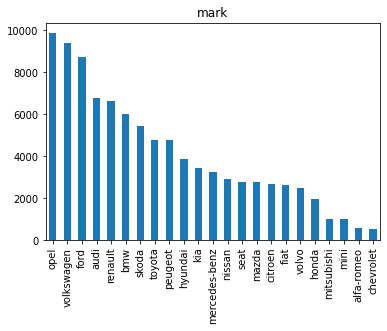

In [ ]:
feature_analysis('mark')

> Terdapat 23 kategori pada fitur mark, dengan jumlah terbanyak adalah kategori 'opel' dan jumlah paling sedikit adalah 'chevrolet'. Sekitar 20% lebih sampel berada pada kategori 'opel', 'volkswagen', dan 'ford'.

> Fitur model

            jumlah sampel  persentase
astra                3180         3.4
a4                   2513         2.7
golf                 2405         2.5
seria-3              2267         2.4
focus                2092         2.2
...                   ...         ...
explorer                2         0.0
s-klasa                 2         0.0
s5                      1         0.0
california              1         0.0
f150                    1         0.0

[290 rows x 2 columns]


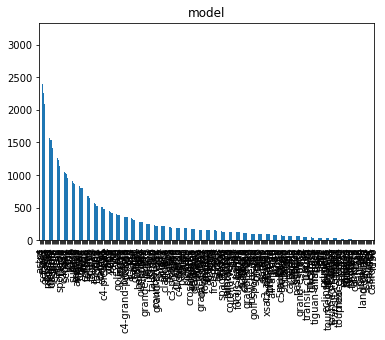

In [ ]:
feature_analysis('model')

> Terdapat 290 kategori pada fitur model dengan jumlah terbanyak adalah kategori 'astra' dan paling sedikit adalah kategori 'f150'. Jumlah kategori pada fitur model terlalu banyak sehingga akan berakibat pada pelatihan model, maka mari hapus fitur ini



In [ ]:
cars.drop(['model'], inplace=True, axis=1)
cars.head()

,mark,year,mileage,vol_engine,fuel,city,province,price
0,opel,2015.0,139568.0,1248.0,Diesel,Janki,Mazowieckie,35900
1,opel,2018.0,31991.0,1499.0,Diesel,Katowice,Śląskie,78501
2,opel,2015.0,278437.0,1598.0,Diesel,Brzeg,Opolskie,27000
3,opel,2016.0,47600.0,1248.0,Diesel,Korfantów,Opolskie,30800
4,opel,2014.0,103000.0,1400.0,CNG,Tarnowskie Góry,Śląskie,35900


> Fitur fuel

          jumlah sampel  persentase
Gasoline          51473        54.5
Diesel            37897        40.1
LPG                3613         3.8
Hybrid             1364         1.4
CNG                  42         0.0
Electric              4         0.0


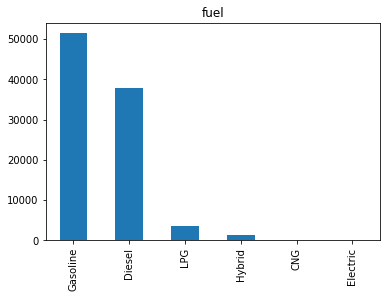

In [ ]:
feature_analysis('fuel')

> Terdapat 5 kategori pada fitur fuel dengan jumlah terbanyak adalah kategori 'Gasiline' dan paling sedikit adalah kategori 'Electric'. Dapat dilihat 90% lebih sampel merupakan kategori 'Gasoline' dan 'Diesel'

> Fitur city

                    jumlah sampel  persentase
Warszawa                     5793         6.1
Łódź                         2250         2.4
Kraków                       2139         2.3
Wrocław                      1923         2.0
Katowice                     1722         1.8
...                           ...         ...
Czernina Dolna                  1         0.0
Matczyn                         1         0.0
Wymysłów Francuski              1         0.0
Antoniów                        1         0.0
Bledzew                         1         0.0

[4151 rows x 2 columns]


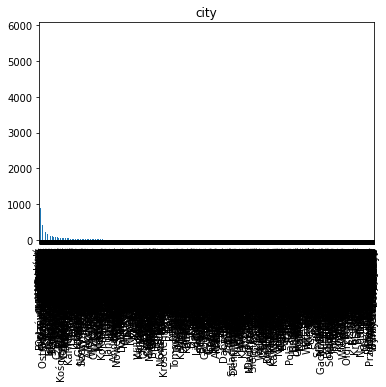

In [ ]:
feature_analysis('city')

> Terdapat 4151 kategori dalam fitur city dengan jumlah terbanyak adalah kategori 'Warszawa' dan paling sedikit adalah kategori 'Bledzew'. Jumlah kategori pada fitur city terlalu banyak sehingga akan berakibat pada pelatihan model, maka mari hapus saja fitur city



In [ ]:
cars.drop(['city'], inplace=True, axis=1)
cars.head()

,mark,year,mileage,vol_engine,fuel,province,price
0,opel,2015.0,139568.0,1248.0,Diesel,Mazowieckie,35900
1,opel,2018.0,31991.0,1499.0,Diesel,Śląskie,78501
2,opel,2015.0,278437.0,1598.0,Diesel,Opolskie,27000
3,opel,2016.0,47600.0,1248.0,Diesel,Opolskie,30800
4,opel,2014.0,103000.0,1400.0,CNG,Śląskie,35900


> Fitur province

                          jumlah sampel  persentase
Mazowieckie                       17361        18.4
Śląskie                           13132        13.9
Wielkopolskie                     11488        12.2
Małopolskie                        7904         8.4
Dolnośląskie                       7180         7.6
Łódzkie                            6168         6.5
Pomorskie                          5846         6.2
Kujawsko-pomorskie                 4310         4.6
Lubelskie                          3996         4.2
Zachodniopomorskie                 3233         3.4
Podkarpackie                       2996         3.2
Świętokrzyskie                     2726         2.9
Warmińsko-mazurskie                2437         2.6
Lubuskie                           2222         2.4
Opolskie                           1680         1.8
Podlaskie                          1673         1.8
Moravian-Silesian Region             34         0.0
Berlin                                2         0.0
Wiedeń      

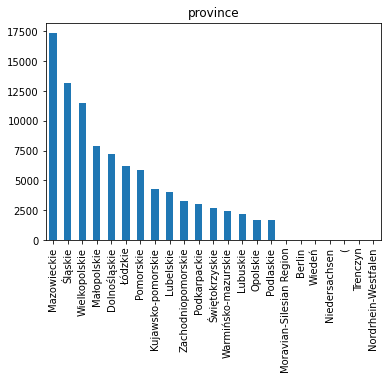

In [ ]:
feature_analysis('province')

> Terdapat 23 kategori pada fitur province dengan jumlah sampel terbanyak berada pada kategori 'Mazowieckie' dan paling sedikit adalah kategori 'Northern-Westfalen'. Dapat dilihat 30% lebih sampel berasal dari kategori 'Mazowieckie', 'Slaskie', dan 'Wielkopolskie'.

##### Kolom Numerik

In [ ]:
numerical_col = cars.select_dtypes(['int', 'float'])
numerical_col.head(2)

,year,mileage,vol_engine,price
0,2015.0,139568.0,1248.0,35900
1,2018.0,31991.0,1499.0,78501


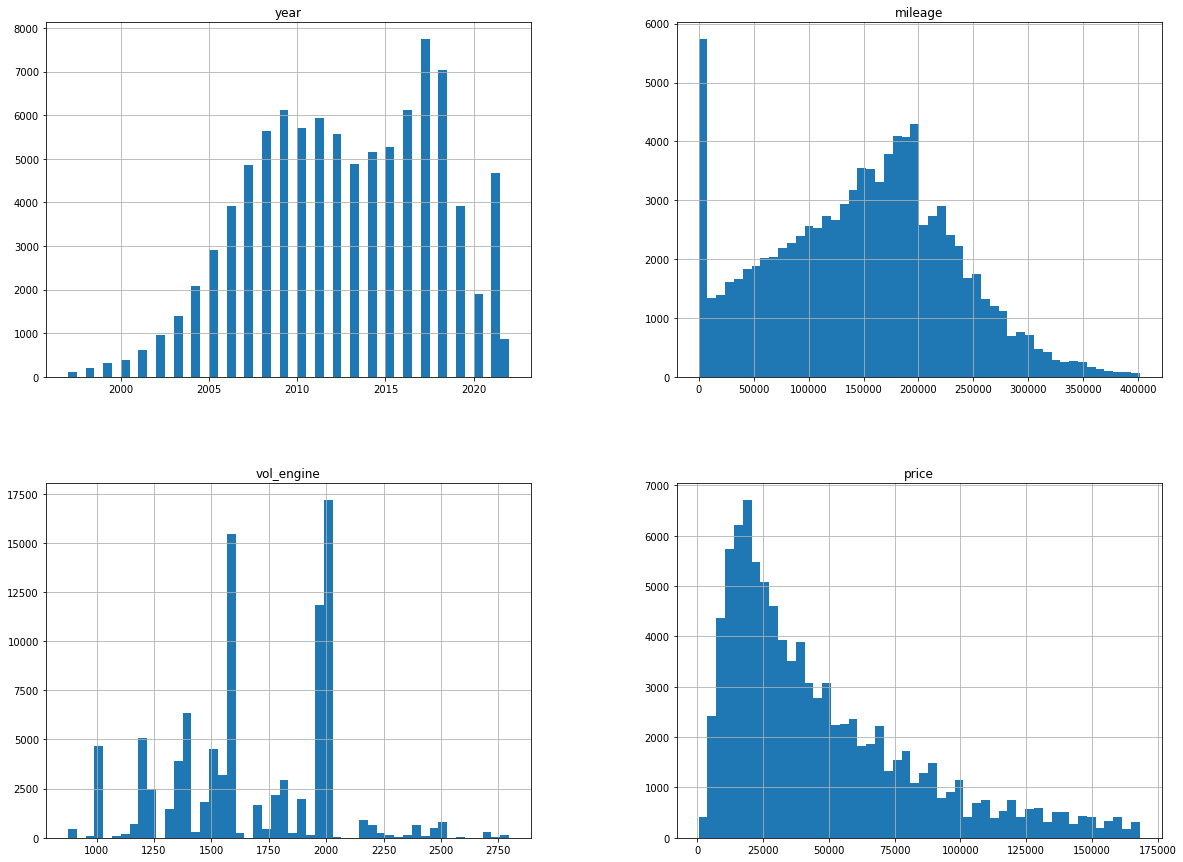

In [ ]:
numerical_col.hist(bins=50, figsize=(20,15))
plt.show()

> Berdasarkan histogram diatas terutama pada histogram price, dapat disimpulkan bahwa:

*   Peningkatan harga mobil sebanding dengan penurunan jumlah sampel
*   Rentang harga mobil cukup tinggi yaitu meningkat hingga \$162.000
*   Setengah harga mobil berada di bawah \$100.000
*   Distribusi harga miring ke kanan.





### Multivariate Analysis

##### Kolom Kategorical

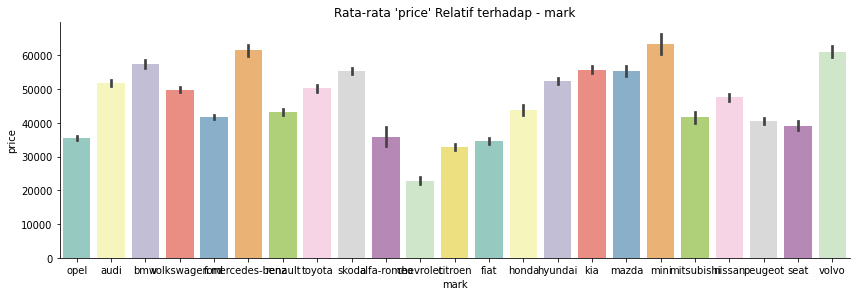

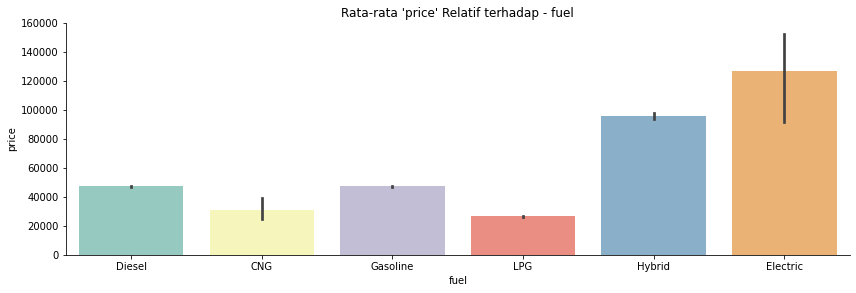

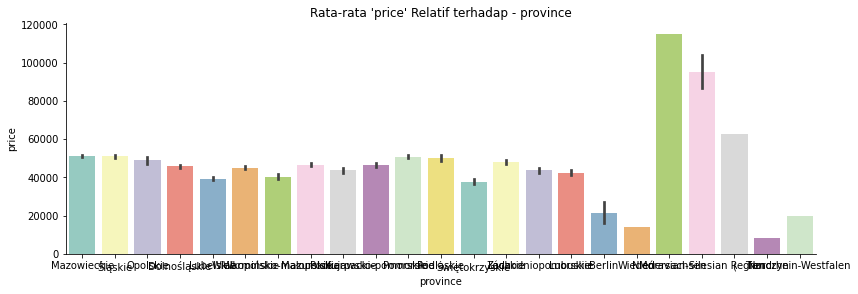

In [ ]:
categorical_col = cars.select_dtypes(['object'])
for col in categorical_col:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=cars, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

> Dengan mengamati harga relatif mobil terhadap fitur di atas, maka dapat disimpulkan bahwa:
*   pada fitur mark, harga mobil relatif bervariasi tergantung merk mobil, sehingga dapat disimpulkan bahwa fitur mark berpengaruh besar terhadap harga mobil
*   pada fitur fuel, harga mobil sangat tinggi pada dua kategori, yaitu hybrid dan electric sehingga dapat disimpulkan fitur fuel juga memiliki pengaruh besar terhadap price
*   pada fitur province, harga mobil cenderung tinggi pada beberapa kategori, sehingga dapat disimpulkan bahwa harga mobil dipengaruhi oleh fitur province
*   kesimpulan akhir, fitur kategori memiliki pengaruh besar terhadap price



##### Kolom Numerik

> Pairplot

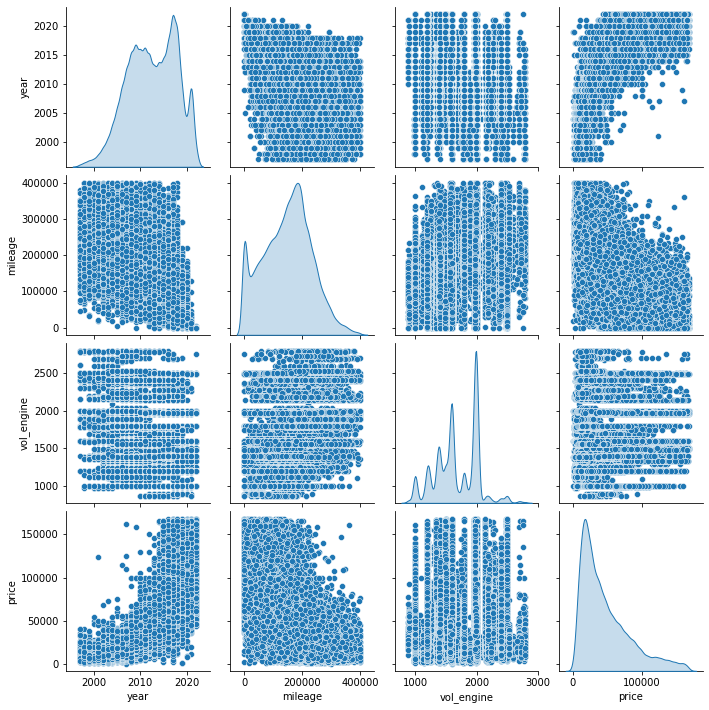

In [ ]:
numerical_col = cars.select_dtypes(['int', 'float'])
sns.pairplot(numerical_col, diag_kind = 'kde')

> Heatmap 

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

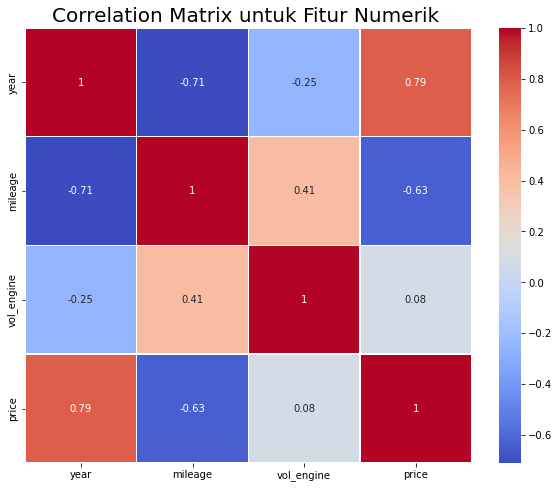

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_col.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

> Berdasarkan visualisasi pairplot dan heatmap di atas, maka dapat disimpulkan hanya fitur year dan mileage yang memiliki cukup korelasi dengan price, sehingga mari hapus saja fitur vol_engine.

In [ ]:
cars.drop(['vol_engine'], inplace=True, axis=1)
cars.head()

,mark,year,mileage,fuel,province,price
0,opel,2015.0,139568.0,Diesel,Mazowieckie,35900
1,opel,2018.0,31991.0,Diesel,Śląskie,78501
2,opel,2015.0,278437.0,Diesel,Opolskie,27000
3,opel,2016.0,47600.0,Diesel,Opolskie,30800
4,opel,2014.0,103000.0,CNG,Śląskie,35900


> Fyuuuhhh, akhirnya selesai juga EDA. Selanjutnya adalah data preparation

# Data Preparation

### Encoding Fitur Kategori

In [ ]:
cars = pd.concat([cars, pd.get_dummies(cars['mark'], prefix='mark')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['fuel'], prefix='fuel')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['province'], prefix='province')],axis=1)
cars.drop(['mark','fuel','province'], axis=1, inplace=True)
cars.head()

,year,mileage,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,mark_ford,...,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,2015.0,139568.0,35900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018.0,31991.0,78501,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015.0,278437.0,27000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016.0,47600.0,30800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014.0,103000.0,35900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [ ]:
y = cars["price"]
X = cars.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 123)

> Cek jumlah dataset

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 94393
Total # of sample in train dataset: 92033
Total # of sample in test dataset: 2360


### Standarisasi

In [ ]:
numerical_features = ['year', 'mileage']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,mileage
45277,-1.052019,1.058895
68500,-0.090684,0.418478
11857,-1.052019,1.284431
77255,-1.436553,-0.101106
41469,0.678384,0.194272


> Cek mean dan standar deviasi menggunakan describe untuk memastikan nilainya 0 dan 1 setelah distandarisasi

In [ ]:
X_train[numerical_features].describe().round(4)

,year,mileage
count,92033.0000,92033.0000
mean,-0.0000,0.0000
std,1.0000,1.0000
min,-2.9747,-1.7928
25%,-0.6675,-0.7415
50%,0.1016,0.0681
75%,0.8707,0.6722
max,1.8320,3.0565


# Model Development
> Pada kasus prediksi harga mobil ini, saya menggunakan tiga model, yaitu KNN, RandomForest, dan AdaBoost. Ketiga model tersebut nantinya akan dibandingkan dan model terbaik akan dijadikan sebagai model evaluasi. Sebelum melakukan model development, mari siapkan dataframe untuk analisis ketiga model tersebut.

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=8, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### AdaBoost

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation

> Langkah pertama adalah melakukan standarisasi pada data test

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

> Setelah ini, mari evaluasi ketiga model yang digunakan

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,234205.149348,257399.825601
RF,275190.638714,280240.814556
Boosting,415770.739132,421141.019751


> Visualisasi menggunakan barplot

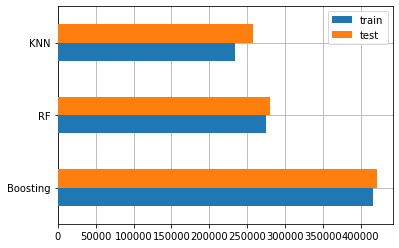

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

> Prediksi Model

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
98991,19900,20073.3,25660.5,26287.5
